<a href="https://colab.research.google.com/github/vimesh630/ML_CW/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Google Drive Mounting

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Dataset from Google Drive

In [2]:
# File paths in Google Drive (update with your actual file paths)
file_paths = {
    "X_train_scaled": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_train_scaled.csv",
    "X_val_scaled": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_val_scaled.csv",
    "X_test_scaled": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/X_test_scaled.csv",
    "y_train": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_train.csv",
    "y_val": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_val.csv",
    "y_test": "/content/drive/My Drive/ML Coursework/Preprocessed Dataset/y_test.csv"
}

# Load the datasets
X_train = pd.read_csv(file_paths["X_train_scaled"]).values
X_val = pd.read_csv(file_paths["X_val_scaled"]).values
X_test = pd.read_csv(file_paths["X_test_scaled"]).values

y_train = pd.read_csv(file_paths["y_train"])['y'].values
y_val = pd.read_csv(file_paths["y_val"])['y'].values
y_test = pd.read_csv(file_paths["y_test"])['y'].values

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

Build and Compile the Neural Network

In [3]:
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Suitable for binary classification
    metrics=['accuracy']
)

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,850 (11.13 KB)

 Trainable params: 2,850 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

Train the Neural Network

In [4]:
# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8446 - loss: 0.3712 - val_accuracy: 0.8728 - val_loss: 0.2969
Epoch 2/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8723 - loss: 0.3020 - val_accuracy: 0.8862 - val_loss: 0.2770
Epoch 3/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8820 - loss: 0.2856 - val_accuracy: 0.8944 - val_loss: 0.2659
Epoch 4/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8853 - loss: 0.2805 - val_accuracy: 0.8956 - val_loss: 0.2605
Epoch 5/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8908 - loss: 0.2715 - val_accuracy: 0.9001 - val_loss: 0.2558
Epoch 6/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8917 - loss: 0.2667 - val_accuracy: 0.8982 - val_loss: 0.2604
Epoch 7/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8928 - loss: 0.2627 - val_accuracy: 0.8978 - val_loss: 0.2528
Epoch 8/50
1609/1609 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8947 - loss: 0.2596 - 

Evaluate the Model

284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.2949
Test Accuracy: 86.15%


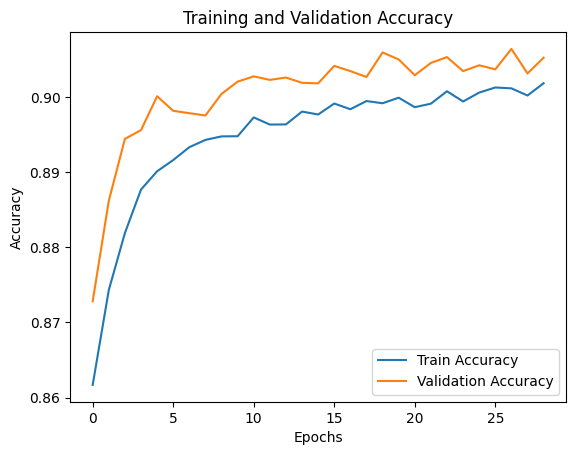

In [5]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Make Predictions and Evaluate Results

In [6]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs[:, 1] > 0.5).astype(int)

# Evaluate predictions
print(classification_report(y_test.argmax(axis=1), y_pred))

284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8036
           1       0.44      0.90      0.60      1026

    accuracy                           0.86      9062
   macro avg       0.71      0.88      0.76      9062
weighted avg       0.92      0.86      0.88      9062

